In [231]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.optimize as sco


mult = 52.1429 #number of weeks per year
data = pd.read_csv('SethFundData.csv', index_col=False)
# print((data).head(10))

def split_data(dataframe):

	df = dataframe.iloc[:,0:7] # select number of columns
	trn_df = df.iloc[int(len(df.index)/5):len(df.index),:]
	sample_df = df.iloc[0:int(len(df.index)/5),:]
	return(trn_df,sample_df)

trn_df = split_data(data)[0]
print((trn_df).head(10))



          Date       BIV       BLV       BND     PARWX        VB      VCIT
80  2016-03-11 -0.001063  0.005535 -0.000489  0.012570  0.006260  0.002938
81  2016-03-04 -0.005461  0.001677 -0.003359  0.026737  0.045342  0.000259
82  2016-02-26  0.002581  0.003999  0.002070  0.018734  0.029818  0.008842
83  2016-02-19  0.000940 -0.003666  0.000366  0.042889  0.038464  0.003559
84  2016-02-12  0.002943  0.009806  0.003543 -0.014502 -0.020279 -0.002137
85  2016-02-05  0.004941  0.008570  0.001886 -0.011221 -0.036437  0.000581
86  2016-01-29  0.007238  0.004400  0.005152  0.005788  0.017953  0.005221
87  2016-01-22 -0.003091 -0.002597 -0.001106  0.001162  0.012520 -0.004629
88  2016-01-15  0.002853  0.005654  0.001353 -0.026005 -0.037098 -0.001657
89  2016-01-08  0.011134  0.015658  0.006541 -0.057934 -0.071844  0.005810


In [232]:
trn_df.mean() * mult

BIV      0.048934
BLV      0.074290
BND      0.033618
PARWX    0.121166
VB       0.111724
VCIT     0.056421
dtype: float64

In [276]:
trn_df.std() * mult

BIV      0.331820
BLV      0.692630
BND      0.233387
PARWX    1.126221
VB       1.380408
VCIT     0.336848
dtype: float64

In [233]:
trn_df.cov() * mult

,BIV,BLV,BND,PARWX,VB,VCIT
BIV,0.002112,0.003801,0.001424,-0.002719,-0.002863,0.001907
BLV,0.003801,0.009200,0.002775,-0.007138,-0.007884,0.003373
BND,0.001424,0.002775,0.001045,-0.001945,-0.002051,0.001285
PARWX,-0.002719,-0.007138,-0.001945,0.024325,0.027541,-0.001130
VB,-0.002863,-0.007884,-0.002051,0.027541,0.036544,-0.000902
VCIT,0.001907,0.003373,0.001285,-0.001130,-0.000902,0.002176


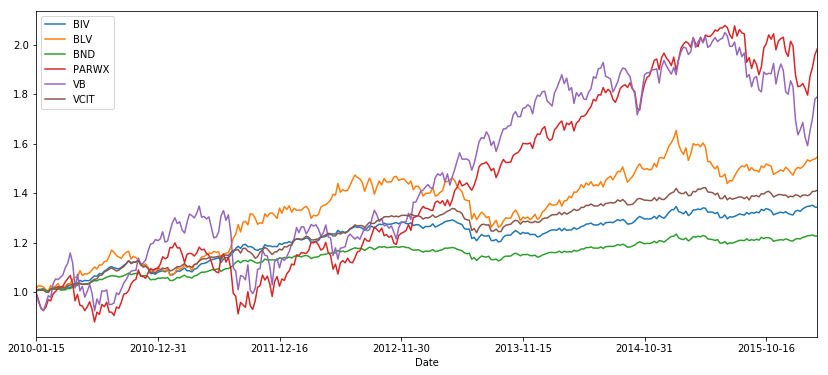

()


In [234]:

def graph_ret(dataframe, location):
	trn_ret_df = dataframe.sort_index(ascending=False)
	trn_ret_df.iloc[:,1:] = trn_ret_df.iloc[:,1:].add(1)
	for row in range(0,len(trn_ret_df.index), +1):
		trn_ret_df.iloc[row,1:] = (trn_ret_df.iloc[row,1:]).mul(trn_ret_df.iloc[row-1,1:])
	trn_ret_df.set_index('Date',inplace=True)
	trn_ret_df.plot(figsize=(14,6))
	plt.savefig(location)
	plt.show()
	plt.close()
	return()
print(graph_ret(trn_df, "./return.png"))

In [235]:
noc=len(trn_df.columns)-1 # total number for index of columns
print("Number of Columns={}".format(noc))

Number of Columns=6


In [236]:
def basic_ret(dataframe, noc):# annualized mean return
	np.random.seed(0)
	weights = np.random.random(noc) # initial random weights
	weights /= np.sum(weights) #take weight devide by sum of eights and save 
	
	exp_ret = np.dot(dataframe.mean(), weights) * mult #annualized expected return with initial weights
	exp_var = np.dot(weights.T, np.dot(dataframe.cov() * mult, weights))
	exp_vol = np.sqrt(exp_var)
	return(exp_var, exp_vol, exp_ret)

In [237]:
def simulation(dataframe, steps, noc):
	prets = []
	pvols = []
	for i in range(steps):
		np.random.seed(i)
		weights = np.random.random(noc)
		weights /= np.sum(weights)
		exp_ret = np.dot(dataframe.mean(), weights) * mult
		prets.append(exp_ret)
		exp_var = np.dot(weights.T, np.dot(dataframe.cov() * mult, weights))
		pvols.append(np.sqrt(exp_var))
	prets = np.array(prets)
	pvols = np.array(pvols)
	return(prets, pvols)

Expected Max Sharp = 1.6581280942786742


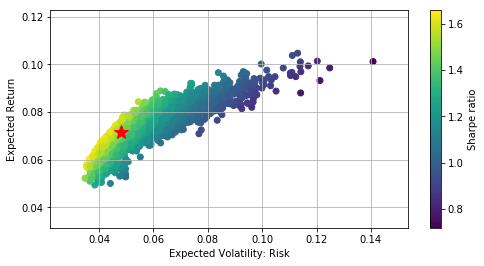

In [238]:
prets, pvols = simulation(trn_df,2500,noc)[0:2]
print("Expected Max Sharp = {}".format(max(prets/pvols)))
exp_vol, exp_ret = basic_ret(trn_df, noc)[1:3]
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets, c= prets / pvols, marker ="o")
plt.plot(exp_vol,exp_ret, 'r*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()


In [264]:
def statistics(weights):
	weights = np.array(weights)
	pret = np.dot(trn_df.mean(), weights) * mult
	pvol = np.sqrt(np.dot(weights.T, np.dot(trn_df.cov() * mult, weights)))
	return(np.array([pret,pvol, pret / pvol]))


In [265]:
base_weights = noc * [1/noc,]
print("baseweights = {}".format(np.array(base_weights).round(4)))

baseweights = [ 0.1667  0.1667  0.1667  0.1667  0.1667  0.1667]


In [266]:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1}) #defining constraints 
bnds = tuple((0, 1) for x in range(noc))
stocknames = np.delete(np.array(trn_df.columns),(0), axis=0)
print(cons)
print(bnds)
print(stocknames)


{'type': 'eq', 'fun': <function <lambda> at 0x00000208C77EE268>}
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
['BIV' 'BLV' 'BND' 'PARWX' 'VB' 'VCIT']


In [267]:
def min_sharpe(weights):
	return(-statistics(weights)[2])

In [268]:
opts = sco.minimize(min_sharpe, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
max_sharp_weights = np.column_stack((stocknames, opts['x'].T.round(3)))
max_sharp_weights = np.flipud(max_sharp_weights[max_sharp_weights[:,1].argsort()])
print("Max Sharp weights")
print(max_sharp_weights)
statoutnames = np.array(['return','volatility', 'sharp'])
pd.DataFrame(np.column_stack((statoutnames, statistics(opts['x']).T.round(4))).T)


Max Sharp weights
[['BIV' 0.436]
 ['BND' 0.333]
 ['PARWX' 0.188]
 ['BLV' 0.027]
 ['VCIT' 0.016]
 ['VB' 0.0]]


,0,1,2
0,return,volatility,sharp
1,0.0582,0.0348,1.6724


0.0582024603647 0.0348012362578


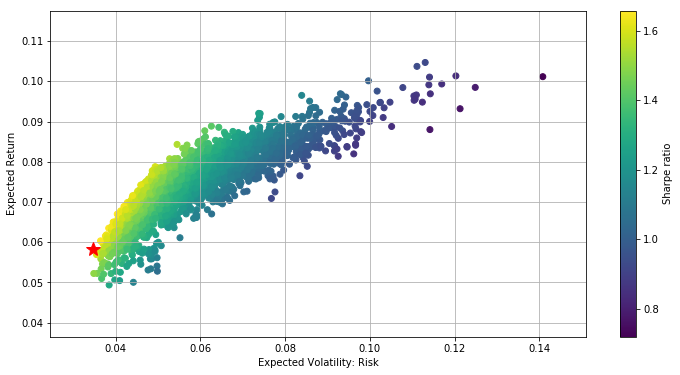

In [258]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_sharp, exp_vol_sharp = statistics(opts['x'])[0:2]
print(exp_ret_sharp, exp_vol_sharp)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_sharp,exp_ret_sharp, 'r*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [269]:
def max_ret(weights):
	return(-statistics(weights)[0])

In [270]:
optr = sco.minimize(max_ret, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
max_ret_weights = np.column_stack((stocknames, optr['x'].T.round(3)))
max_ret_weights = np.flipud(max_ret_weights[max_ret_weights[:,1].argsort()])
print("Maximize return weights")
print(max_ret_weights)
pd.DataFrame(np.column_stack((statoutnames, statistics(optr['x']).T.round(4))).T)

Maximize return weights
[['PARWX' 1.0]
 ['VCIT' 0.0]
 ['VB' 0.0]
 ['BND' 0.0]
 ['BLV' 0.0]
 ['BIV' 0.0]]


,0,1,2
0,return,volatility,sharp
1,0.1212,0.156,0.7769


0.121165937966 0.155964604754


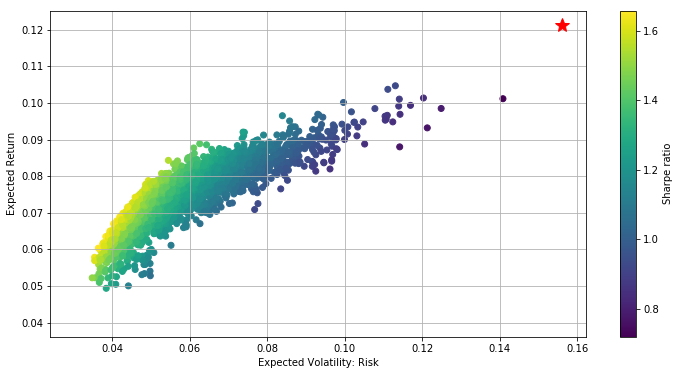

In [271]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_ret, exp_vol_ret = statistics(optr['x'])[0:2]
print(exp_ret_ret, exp_vol_ret)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_ret,exp_ret_ret, 'r*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [272]:
def min_pvol(weights):   #New function to minimize
	return(statistics(weights)[1])

In [277]:
optv = sco.minimize(min_pvol, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
min_vol_weights = np.column_stack((stocknames, optv['x'].T.round(3)))
min_vol_weights = np.flipud(min_vol_weights[min_vol_weights[:,1].argsort()])
print("Minimize risk weights")
print(min_vol_weights)
pd.DataFrame(np.column_stack((statoutnames, statistics(optv['x']).T.round(4))).T)

Minimize risk weights
[['BND' 0.898]
 ['PARWX' 0.102]
 ['VCIT' 0.0]
 ['VB' 0.0]
 ['BLV' 0.0]
 ['BIV' 0.0]]


,0,1,2
0,return,volatility,sharp
1,0.0425,0.0272,1.5637


0.042511269541 0.027185924805


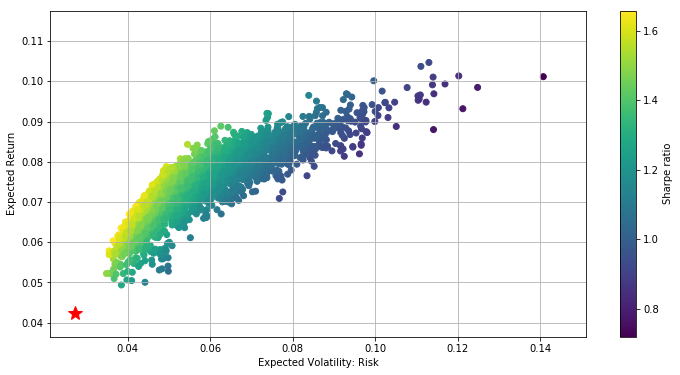

In [278]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_vol, exp_vol_vol = statistics(optv['x'])[0:2]
print(exp_ret_vol, exp_vol_vol)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_vol,exp_ret_vol, 'r*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [296]:
trets = np.linspace(0.05,0.11,10)
tvols = []
tweights = []

for tret in trets:
	cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - tret},   #New constraints
			{'type':'eq', 'fun':lambda x: np.sum(x) - 1})
	res = sco.minimize(min_pvol, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
	tvols.append(res['fun'])
	# temp2 = np.column_stack((res['fun'], res['x'].round(3)))
	# temp1 = np.column_stack(tret)
	
	# tweights.append(temp2)
	# # tweights.append(tret)
	# tweights.append(res['fun'])
	tweights.append(res['x'].round(3))
tvols = np.array(tvols)
tweights = np.array(tweights)


front_line = np.column_stack((trets, tvols)).round(3)
tweights = np.column_stack((front_line,tweights))
tweights = np.transpose(tweights)
print(tweights)

dummy = ['return','volatility']
dummy = np.array(dummy)
dummy = np.append(dummy, stocknames)
dummy = np.column_stack((dummy,tweights))


[[ 0.05   0.057  0.063  0.07   0.077  0.083  0.09   0.097  0.103  0.11 ]
 [ 0.03   0.034  0.038  0.042  0.047  0.053  0.059  0.067  0.085  0.11 ]
 [ 0.164  0.265  0.508  0.593  0.256  0.127  0.013  0.     0.     0.   ]
 [ 0.     0.036  0.082  0.136  0.257  0.395  0.534  0.523  0.38   0.238]
 [ 0.675  0.446  0.198  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.158  0.182  0.213  0.241  0.271  0.321  0.373  0.477  0.62   0.762]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.003  0.072  0.     0.03   0.216  0.157  0.08   0.     0.     0.   ]]


In [297]:
pd.DataFrame(dummy)

,0,1,2,3,4,5,6,7,8,9,10
0,return,0.05,0.057,0.063,0.07,0.077,0.083,0.09,0.097,0.103,0.11
1,volatility,0.03,0.034,0.038,0.042,0.047,0.053,0.059,0.067,0.085,0.11
2,BIV,0.164,0.265,0.508,0.593,0.256,0.127,0.013,0,0,0
3,BLV,0,0.036,0.082,0.136,0.257,0.395,0.534,0.523,0.38,0.238
4,BND,0.675,0.446,0.198,0,0,0,0,0,0,0
5,PARWX,0.158,0.182,0.213,0.241,0.271,0.321,0.373,0.477,0.62,0.762
6,VB,0,0,0,0,0,0,0,0,0,0
7,VCIT,0.003,0.072,0,0.03,0.216,0.157,0.08,0,0,0


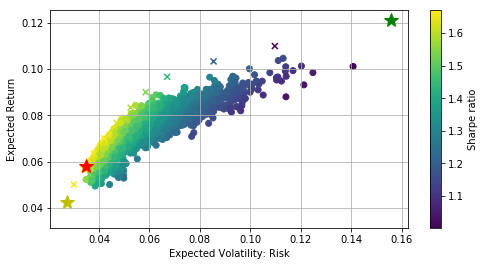

In [282]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets, c=prets / pvols, marker ="o")
plt.scatter(tvols,trets, c=trets / tvols, marker ="x")
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0], 'y*', markersize=15.0)
plt.plot(statistics(optr['x'])[1],statistics(optr['x'])[0], 'g*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./FrontierLine.png")
plt.show()
plt.close()


In [284]:
sample_df = split_data(data)[1]


In [288]:
sample_df.mean() * mult


BIV      0.025446
BLV      0.061241
BND      0.027992
PARWX    0.202221
VB       0.169977
VCIT     0.052331
dtype: float64

In [290]:
sample_df.std() * mult

BIV      0.299527
BLV      0.668946
BND      0.248198
PARWX    0.800455
VB       0.856116
VCIT     0.298949
dtype: float64

In [317]:
##Choose your column
xx = 7
optweights = tweights[:,xx - 1][2:]


In [325]:
def test(weights, dataframe):
	weights = np.array(weights)
	pret = np.dot(dataframe.mean(), weights) * mult
	pvol = np.sqrt(np.dot(weights.T, np.dot(dataframe.cov() * mult, weights)))
	return(np.array([pret,pvol, pret / pvol]))


In [326]:
pd.DataFrame(np.column_stack((statoutnames, test(optweights,sample_df).T.round(4))).T)

,0,1,2
0,return,volatility,sharp
1,0.1126,0.0606,1.8584


In [339]:
def max_test(weights,dataframe):
	return(test(weights,dataframe)[1])

test_cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1}) #defining constraints 



In [341]:
opt_test = sco.minimize(max_test, base_weights,args=(sample_df), method='SLSQP', bounds=bnds, constraints=test_cons)
min_vol_test = np.column_stack((stocknames, opt_test['x'].T.round(3)))
min_vol_test = np.flipud(min_vol_test[min_vol_test[:,1].argsort()])
print("Minimize risk weights")
print(min_vol_test)
# pd.DataFrame(np.column_stack((statoutnames, test(opt_test['x'],).T.round(4))).T)

Minimize risk weights
[['BND' 0.864]
 ['PARWX' 0.136]
 ['VCIT' 0.0]
 ['VB' 0.0]
 ['BLV' 0.0]
 ['BIV' 0.0]]
